# EvaluateSelection-DPR-TQA-DEV

- Analysis on NQ-2-get-data-for-incremental-data results
- sample size 20 or 100

In [1]:
from cycler import cycler
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pathlib
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import os
from rich.console import Console
from rich.table import Table
from util import utils
import re

In [2]:
def get_table(title, columns, rows):

    table = Table(title=title)
    
    table.add_column("", justify="center")
    for column in columns:
        table.add_column(column, justify="center")
    
    for row in rows:
        table.add_row(*row)
        

    console = Console(record=True)
    console.print(table, justify="center")
#     console.save_text(f"./images/{title}")

In [3]:
raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]


light_palette = np.array(raw_light_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255

Light mode palette


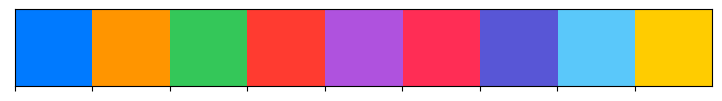

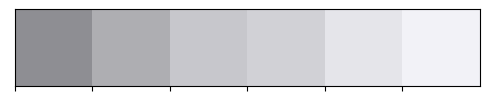

In [4]:
print('Light mode palette')
sns.palplot(light_palette)
sns.palplot(gray_light_palette)

In [5]:
# cmap 수정
mpl.rcParams['axes.prop_cycle'] = cycler('color',light_palette)
# 해상도 조정
mpl.rcParams['figure.dpi'] = 200
# ax의 우측과 상단 지우기
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

## KILT BM25 NQ negative (from DPR) depreciated

In [6]:
# option = 'bm25'
# path = '/data/philhoon-relevance/FiD/results/KILT_DPR_NQ'
# # path = '/data/philhoon-relevance/FiD/results/KILT_DPR_NQ_depreciated'
# plot_path = './img/FiDResultOnBM25HardnegativeNQdevSubsets.png'
# title = 'FiD result on BM25 negative nq dev subsets'

## KILT Random Sampling NQ negative  depreciated

In [7]:
# option = 'random'
# path = '/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ'
# plot_path = './img/FiDResultOnRandomSamplingnegativeNQdevSubsets.png'
# title = 'FiD result on random sampling negative nq dev subsets'

## KILT BM25 NQ negative (from DPR)

In [8]:
# option = 'bm25'
# path = '/data/philhoon-relevance/FiD/results/KILT_BM25_NQ'

## KILT Random Sampling NQ negative 

In [9]:
# option = 'random'
# path = '/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ'
# plot_path = './img/New_FiDResultOnRandomSamplingnegativeNQdev2539.png'
# title = 'New FiD result on random sampling negative nq dev subsets'

In [10]:
# path = pathlib.Path(path)

In [11]:
# files = path.glob('**/*.txt')
# pprint(list(files))

In [12]:
# dict_eval = {
#     'pos' : [],
#     'ctx' : [],
#     'em' : []
# }

# sample_size = 5
# for pos in range(1, sample_size+1):
#     for ctx in range(pos, sample_size+1):
    
# #         # bm25 negative filenames
# #         file_name_ = f'kilt_dpr_nq_dev_pos{pos}_context{ctx}'

#         # random sampling negative filenames
#         if option == 'random':
#             file_name_ = f'kilt_rand_nq_dev_pos{pos}_context{ctx}'
#             file = list(path.glob(f'*{file_name_}*/*.txt'))
#             test = file[0] 
#         # DPR should be changed to bm25
#         if option == 'bm25':
#             file_name_ = f'kilt_bm25_nq_dev_pos{pos}_context{ctx}'
#             file = list(path.glob(f'*{file_name_}*/*.txt'))
#             test = file[0] 
        
#         print(test)
        
#         df = pd.read_csv(test, sep = '\t', header=None)
#         df.columns = ['id','inference','em']
#         print(len(df))
#         em = float(sum(df['em'])/len(df))
        
#         dict_eval['pos'].append(pos)
#         dict_eval['ctx'].append(ctx)
#         dict_eval['em'].append(em)
        
        

## KILT BM25 NQ incremetal result (from DPR)
    -  Get upperbound & lowerBound

In [13]:
# # '/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/incremental_result/pos1_ctx1.json'
# pos = 1
# sample_size = 5
# path2 = '/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/incremental_result/'

In [14]:
# path2 = pathlib.Path(path2)
# files = path2.glob(f'pos{pos}*.txt')
# pprint(list(files))

## NQ DPR NQ incremetal result 
    - Realistic Scenario
    - Get upperbound & lowerBound
    - Unlike preivous one
    - Upperbound : Accumulated EM of FiD from from top_20
    - Lowerbound : EM of FiD from DPR retrived from top_20
    - Values : 16 Selection Strategies

### Lowerbound : EM of FiD from DPR retrived from sample_size(20,100)

In [15]:
# path = '/data/philhoon-relevance/FiD/results/NQ_DPR/DEV'
# title = 'FiD result by number of passage on DPR retrieved dataset'
# path = pathlib.Path(path)

# TQA DEV NQ incremetal result 

In [16]:
dataset = 'TQA'
retriever = 'DPR'
data_type = 'dev'

In [17]:
sample_size = 100
path = f'/data/philhoon-relevance/FiD/results/{dataset}_{retriever}/{data_type.upper()}'

In [18]:
print(path)

/data/philhoon-relevance/FiD/results/TQA_DPR/DEV


In [19]:
path = pathlib.Path(path)
# title = 'FiD result by number of passage on DPR retrieved dataset'

In [20]:
files = path.glob('**/final_output.txt')
# print(len(list(files)))
# pprint(sorted(list(files)))

In [21]:
def get_incremental_eval(dataset, data_type, sample_size, path):
    dict_eval = {
        'ctx' : [],
        'em' : []
    }

    for ctx in range(1, sample_size+1):
        file_name_ = f'{dataset}_{data_type}_{ctx}_context'
        file_path = list(path.glob(f'**/{file_name_}*/*.txt'))

        try:
            print(file_name_)
            test = file_path[0]
        except:
            print(f'wrong {file_name_}')

        df = pd.read_csv(test, sep = '\t', header=None, quoting=3)
        print(len(df))
        df.columns = ['id','inference','em']
    #     print(len(df))
        em = float(sum(df['em'])/len(df))

        dict_eval['ctx'].append(ctx)
        dict_eval['em'].append(em)
        
    return dict_eval

In [22]:
normal_eval = get_incremental_eval(dataset, data_type, sample_size, path)

TQA_dev_1_context
8837
TQA_dev_2_context
8837
TQA_dev_3_context
8837
TQA_dev_4_context
8837
TQA_dev_5_context
8837
TQA_dev_6_context
8837
TQA_dev_7_context
8837
TQA_dev_8_context
8837
TQA_dev_9_context
8837
TQA_dev_10_context
8837
TQA_dev_11_context
8837
TQA_dev_12_context
8837
TQA_dev_13_context
8837
TQA_dev_14_context
8837
TQA_dev_15_context
8837
TQA_dev_16_context
8837
TQA_dev_17_context
8837
TQA_dev_18_context
8837
TQA_dev_19_context
8837
TQA_dev_20_context
8837
TQA_dev_21_context
8837
TQA_dev_22_context
8837
TQA_dev_23_context
8837
TQA_dev_24_context
8837
TQA_dev_25_context
8837
TQA_dev_26_context
8837
TQA_dev_27_context
8837
TQA_dev_28_context
8837
TQA_dev_29_context
8837
TQA_dev_30_context
8837
TQA_dev_31_context
8837
TQA_dev_32_context
8837
TQA_dev_33_context
8837
TQA_dev_34_context
8837
TQA_dev_35_context
8837
TQA_dev_36_context
8837
TQA_dev_37_context
8837
TQA_dev_38_context
8837
TQA_dev_39_context
8837
TQA_dev_40_context
8837
TQA_dev_41_context
8837
TQA_dev_42_context
8837
T

In [23]:
# def get_incremental_data():
#     normal_eval = {
#         'ctx' : [],
#         'em' : []
#     }

#     for ctx in range(1, sample_size+1):
#         file_name_ = f'NQ_dev_{ctx}_context'
#         file_path = list(path.glob(f'**/{file_name_}*/*.txt'))

#         test = file_path[0]
#         print(file_name_)
#         df = pd.read_csv(test, sep = '\t', header=None)
#         df.columns = ['id','inference','em']
#     #     print(len(df))
#         em = float(sum(df['em'])/len(df))

#         normal_eval['ctx'].append(ctx)
#         normal_eval['em'].append(em)
#     return 
        
        

In [24]:
# pprint(normal_eval)

In [25]:
def get_lowerbound(incre_em):
    index_min = np.argmin(incre_em['em'])
    return incre_em['ctx'][index_min], incre_em['em'][index_min]

In [26]:
def get_upperbound(incre_em):
    index_max = np.argmax(incre_em['em'])
    return incre_em['ctx'][index_max], incre_em['em'][index_max]

##### Maximum of EM of FiD from DPR retrived from top_20
    - Used as lower bound
    
##### Minimum of EM of FiD from DPR retrived from top_20
    - Won't be used

In [27]:
upper_ctx, upper_em = get_upperbound(normal_eval)
print(upper_ctx, upper_em)
flower_ctx, flower_em = upper_ctx, upper_em

100 0.7234355550526197


In [28]:
lower_ctx, lower_em = get_lowerbound(normal_eval)
print(lower_ctx, lower_em)

1 0.5469050582776961


### Upperbound : Accumulated EM of FiD

In [29]:
input_file = f'/data/philhoon-relevance/FiD/results/{dataset}_{retriever}/{data_type.upper()}/incremental_result_{sample_size}/ctx{sample_size}.json'

In [30]:
print(input_file)

/data/philhoon-relevance/FiD/results/TQA_DPR/DEV/incremental_result_100/ctx100.json


In [31]:
final_output = utils.open_json(input_file)

In [32]:
print(len(final_output))

8837


In [33]:
def extract_em_pattern(final_output):
    em_pattern_lst = []
    for instance in final_output:
        em_pattern_lst.append(instance['em_pattern'])
    return em_pattern_lst

In [34]:
em_pattnern_lst = extract_em_pattern(final_output)

In [35]:
def get_accumulated_em(em_pattnern_lst, sample_size):
    incre_em = {
        'ctx' : [],
        'em' : [],   
    }
    for ctx in range(1, sample_size+1):
        incre_em['ctx'].append(ctx)
        cnt = 0
        for pattern in em_pattnern_lst:
            if '1' in pattern[:ctx]:
                cnt += 1
        incre_em['em'].append(cnt/len(em_pattnern_lst))
    return incre_em

In [36]:
incre_em = get_accumulated_em(em_pattnern_lst, sample_size)

In [37]:
# incre_em

In [38]:
upper_ctx, upper_em = get_upperbound(incre_em)
print(upper_ctx, upper_em)

100 0.7774131492587982


##### Maximum of Accumulated EM of FiD from DPR retrived from top_20
    - Used as upper bound
    
##### Minimum of Accumulated EM of FiD from DPR retrived from top_20
    - Won't be used

In [39]:
upper_ctx, upper_em = get_upperbound(incre_em)
print(upper_ctx, upper_em)
fupper_ctx, fupper_em = upper_ctx, upper_em

100 0.7774131492587982


In [40]:
lower_ctx, lower_em = get_lowerbound(incre_em)
print(lower_ctx, lower_em)

1 0.5469050582776961


## NQ DPR NQ selection strategy result

In [41]:
option_dict = {
    'op1' : 'remove_damage',
    'op2' : 'remove_damage_irrelevant',
    'op3' : 'remove_damage_relevant',
    'op4' : 'remove_damage_irrelevant_relevant',
}
# option = 'op4'

In [42]:
option_p_dict = {
    'strict' : 'strict_positive',
    'naive' : 'naive_positive',
}
# option_p = 'strict'

In [43]:
option_d_dict = {
    'strict' : 'strict_damaging',
    'naive' : 'naive_damaging',
}
# option_d = 'strict'

In [44]:
# input_path = f'/data/philhoon-relevance/FiD/results/NQ_DPR_DEV_SELECTION/ctx_{sample_size}'

In [45]:
# /data/philhoon-relevance/FiD/results/NQ_TEST_DPR_SELECTION/

In [46]:
# input_file = f'/data/philhoon-relevance/FiD/results/{dataset}_{retriever}/{data_type.upper()}/incremental_result_{sample_size}/ctx{sample_size}.json'

In [47]:
input_path = f'/data/philhoon-relevance/FiD/results/{dataset}_{data_type.upper()}_{retriever}_SELECTION/'

In [48]:
print(input_path)

/data/philhoon-relevance/FiD/results/TQA_DEV_DPR_SELECTION/


In [49]:
in_path = pathlib.Path(input_path)
files = in_path.glob(f'**/*.txt')
# pprint(list(files))
# for i in files:
# #     print(len(i))
#     print(i)
#     print('----')

## Conclusion
- option1, option2 are not needed
- Method1 : option4_naive_naive
- Method2 : option4_strict_naive 
- Method3 : option3_naive_naive
- Method4 : option3_strict_naive
- Method5 : option3_naive_strict
- Method6 : option3_strict_strict

In [50]:
dict_eval = {
    'strategy' : [],
    'em' : []
}

for op in option_dict.keys():
    for op_p in option_p_dict.keys():
        for op_d in option_d_dict.keys():
            
            if op == 'op1' or op == 'op2':
                continue
            if op == 'op4' and op_p == 'strict' and op_d == 'strict':
                continue
            if op == 'op4' and op_p == 'naive' and op_d == 'strict':
                continue 
                
                
            strategy_ = f'{option_p_dict[op_p]}_{option_d_dict[op_d]}_{option_dict[op]}'
            strategy_name = f'{op}_{op_p}_{op_d}'
            print(strategy_)
            strategy_path = pathlib.Path(input_path, strategy_)
            file = list(strategy_path.glob(f'*.txt'))
            if len(file) != 1:
                print('----')
                print(f'strategy_name : {strategy_name}')
                print('Errror - no file')
                print('There should be 1 file per each path')
                print(file)
                print('----')
            else:
                test = file[0] 
            
    #             print(test)
                df = pd.read_csv(test, sep = '\t', header=None, quoting=3)
                df.columns = ['id','inference','em']
                print(len(df))
                em = float(sum(df['em'])/len(df))

                dict_eval['strategy'].append(strategy_name)
                dict_eval['em'].append(em)
            

strict_positive_strict_damaging_remove_damage_relevant
8837
strict_positive_naive_damaging_remove_damage_relevant
8837
naive_positive_strict_damaging_remove_damage_relevant
8837
naive_positive_naive_damaging_remove_damage_relevant
8837
strict_positive_naive_damaging_remove_damage_irrelevant_relevant
8837
naive_positive_naive_damaging_remove_damage_irrelevant_relevant
8837


In [51]:
dict_eval

{'strategy': ['op3_strict_strict',
  'op3_strict_naive',
  'op3_naive_strict',
  'op3_naive_naive',
  'op4_strict_naive',
  'op4_naive_naive'],
 'em': [0.7408622835804006,
  0.7742446531628381,
  0.7389385538078533,
  0.7763947040850967,
  0.7511598958922712,
  0.7628154351024103]}

In [52]:
method_dict = {
    'op3_strict_strict' : 'method6',
    'op3_strict_naive' : 'method4',
    'op3_naive_strict' : 'method5',
    'op3_naive_naive' : 'method3',
    'op4_strict_naive' : 'method2',
    'op4_naive_naive' : 'method1',
}

In [53]:
get_new_s = []
for s_ in dict_eval['strategy']:
    get_new_s.append(method_dict[s_])
dict_eval['strategy'] = get_new_s

In [54]:
def merge_normal_incre(incre_em, normal_eval, dict_eval):
    column_names = []
    row_values = []
    upper_ctx, upper_em = get_upperbound(incre_em)
    lower_ctx, lower_em = get_upperbound(normal_eval)
    column_names.append('UpperBound-AccumulatedEm')
    column_names.append('LowerBound-PositiveOneEm')
    row_values.append(str(upper_em))
    row_values.append(str(lower_em))
    
    for strat_, em_ in zip(dict_eval['strategy'], dict_eval['em']):
        column_names.append(strat_)
        row_values.append(str(em_))
        
    return column_names, row_values
    

In [55]:
# incre_em

In [56]:
col_lst, value_lst = merge_normal_incre(incre_em, normal_eval, dict_eval)

In [57]:
print(col_lst)
print(value_lst)

['UpperBound-AccumulatedEm', 'LowerBound-PositiveOneEm', 'method6', 'method4', 'method5', 'method3', 'method2', 'method1']
['0.7774131492587982', '0.7234355550526197', '0.7408622835804006', '0.7742446531628381', '0.7389385538078533', '0.7763947040850967', '0.7511598958922712', '0.7628154351024103']


In [58]:
def get_table(title, columns, rows, save_path):

    table = Table(title=title)
    
    table.add_column("", justify="center")
    for column in columns:
        table.add_column(column, justify="center")
    
    if any(isinstance(i, list) for i in rows):
        for row in rows:
            table.add_row(*row)
    else:
#         print(rows)
        name = 'result'
        single_row = [name] + rows
        table.add_row(*single_row)
        

    console = Console(record=True)
    console.print(table, justify="center")
    console.save_svg(save_path, title=title)
#     console.save_text(f"./images/{title}")

In [59]:
# dataset = 'NQ'
# retriever = 'CONTRIEVER'
# data_type = 'dev'

In [60]:
unit = 2
s_ind = 0
e_ind = s_ind + unit
title = f'{retriever}-{dataset}-{data_type.upper()}'
save_path = f'./img/{retriever}-{dataset}-{data_type.upper()}-TABLE-bounds.svg'

In [61]:
print(title)
print(save_path)

DPR-TQA-DEV
./img/DPR-TQA-DEV-TABLE-bounds.svg


In [62]:
get_table(title, col_lst[s_ind:e_ind], value_lst[s_ind:e_ind], save_path)

                          DPR-TQA-DEV                                                     
                         ┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓                          
                         ┃        ┃ UpperBound-AccumulatedEm ┃ LowerBound-PositiveOneEm ┃                          
                         ┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩                          
                         │ result │    0.7774131492587982    │    0.7234355550526197    │                          
                         └────────┴──────────────────────────┴──────────────────────────┘

In [63]:
unit = 6
s_ind = e_ind
e_ind = s_ind + unit
title = f'{retriever}-{dataset}-{data_type.upper()}'
save_path = f'./img/{retriever}-{dataset}-{data_type.upper()}-TABLE-SELECTION.svg'


In [64]:
get_table(title, col_lst[s_ind:e_ind], value_lst[s_ind:e_ind], save_path)

                                                    DPR-TQA-DEV                                                    
┏━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃        ┃    method6     ┃     method4     ┃    method5     ┃     method3     ┃    method2     ┃     method1     ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ result │ 0.74086228358… │ 0.774244653162… │ 0.73893855380… │ 0.776394704085… │ 0.75115989589… │ 0.762815435102… │
└────────┴────────────────┴─────────────────┴────────────────┴─────────────────┴────────────────┴─────────────────┘

#### Sample_size 20 Results
##### Summary
: Keeping first consecutive 0's + adding all 1 context close to Upperbound; however, only keep first 1s shows  comparable result  
: __Keeping first consecutive 0's__ was natural since we included and positioned the positive context at top-1 


- Upperbound 0.5811350
- Method3. '00011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (__0.578394__)     

- Method4. '00011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span>10<span style="color:red">1</span>1000 (_0.576909_)    

- Method1. '00011011000'  -> 000<span style="color:red">1</span><span style="color:red">1</span>0<span style="color:red">1</span><span style="color:red">1</span>000 (0.551444)    

- Method2. '00011011000'  -> 000<span style="color:red">1</span>10<span style="color:red">1</span>1000  (0.53796)        
- Method6. '00011011000'  -> <span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span>10<span style="color:red">1</span>10<span style="color:blue">0</span><span style="color:blue">0</span> (0.53796)    

- Method5. '00011011000'  -> <span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:blue">0</span><span style="color:blue">0</span>    (0.536599) 

- Lowerbound 0.502112

## DPR-3-NQ-TEST

#### Sample_size 100 Results
##### Summary
: Keeping first consecutive 0's + adding all 1 context close to Upperbound; however, only keep first 1s shows  comparable result  
: __Keeping first consecutive 0's__ was natural since we included and positioned the positive context at top-1 


- Upperbound 0.65124653
- Method3. '00011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (__0.64653__)     

- Method4. '00011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span>10<span style="color:red">1</span>1000 (_0.64459_)    

- Method1. '00011011000'  -> 000<span style="color:red">1</span><span style="color:red">1</span>0<span style="color:red">1</span><span style="color:red">1</span>000 (0.611634)    

- Method2. '00011011000'  -> 000<span style="color:red">1</span>10<span style="color:red">1</span>1000  (0.593351)        
- Method6. '00011011000'  -> <span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span>10<span style="color:red">1</span>10<span style="color:blue">0</span><span style="color:blue">0</span> (0.584487)    

- Method5. '00011011000'  -> <span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:blue">0</span><span style="color:blue">0</span>    (0.580332) 

- Lowerbound 0.546260